# SNIDdataset and SNIDsn Tutorial

In [40]:
import SNIDsn
import SNIDdataset
import numpy as np

## SNIDsn

SNIDsn is a Python class that loads the .lnw template files from SNID. An instance has the following fields:

header -- A dictionary containing information about the template.

continuum -- A numpy array containing the removed continuum.

phases -- A numpy array of the phases observed in the template.

phaseType -- 0 for phases measured relative to Vmax, 1 for date of discovery.

wavelengths -- A numpy array with the wavelengths for the observed spectra.

data -- A structured numpy array containing the spectra. Check dtype.names for column names.

type -- A string giving the type of the object in the template.

subtype -- A string giving the subtype (if any) of the object in the template.

In [41]:
sn04gt = SNIDsn.SNIDsn()


In [42]:
sn04gt.loadSNIDlnw('Tutorial_Data/sn2004gt.lnw')

In [43]:
sn04gt.header

{'Nspec': 13,
 'Nbins': 1024,
 'WvlStart': 2500.0,
 'WvlEnd': 10000.0,
 'SplineKnots': 10,
 'SN': 'sn2004gt',
 'dm15': -9.99,
 'TypeStr': 'Ic-norm',
 'TypeInt': 3,
 'SubTypeInt': 2}

In [44]:
sn04gt.phases

array([ 16.4,  18.4,  19.4,  22.4,  43.3,  48.2,  70.1,  81.1, 100. ,
       131.8, 141.7, 167.6, 186.5])

Get column names for spectra structured array

In [45]:
print(sn04gt.data.dtype.names)
print(sn04gt.getSNCols())

('Ph16.4', 'Ph18.4', 'Ph19.4', 'Ph22.4', 'Ph43.3', 'Ph48.2', 'Ph70.1', 'Ph81.1', 'Ph100.0', 'Ph131.8', 'Ph141.7', 'Ph167.6', 'Ph186.5')
('Ph16.4', 'Ph18.4', 'Ph19.4', 'Ph22.4', 'Ph43.3', 'Ph48.2', 'Ph70.1', 'Ph81.1', 'Ph100.0', 'Ph131.8', 'Ph141.7', 'Ph167.6', 'Ph186.5')


Use column names to get spectra at specific phases:

In [46]:
spec = sn04gt.data['Ph16.4']

Filter wavelengths to a certain range, and filter the spectra.

In [47]:
sn04gt.wavelengthFilter(wvlmin=4000, wvlmax=7000)
print(sn04gt.wavelengths.shape)
print(sn04gt.data.shape)

(414,)
(414,)


Replace 0.0 placeholder value used by SNID with np.nan

In [48]:
sn04gt.snidNAN()

Remove columns from the spectra matrix.

In [49]:
sn04gt.removeSpecCol('Ph167.6')

In [50]:
sn04gt.phases

array([ 16.4,  18.4,  19.4,  22.4,  43.3,  48.2,  70.1,  81.1, 100. ,
       131.8, 141.7, 186.5])

Find the wavelength ranges of NaN gaps in a spectrum.

In [51]:
sn04gt.findGaps('Ph19.4')

[(6031.16, 6031.16), (6298.19, 6298.19), (6766.7, 6766.7)]

Find the interpolation range if a small gap intersects with an end.

In [52]:
sn04gt.getInterpRange(minwvl=4996.62, maxwvl=6006.72, phase='Ph19.4')

(4996.62, 6006.72)

Interpolate over gaps in a spectrum.

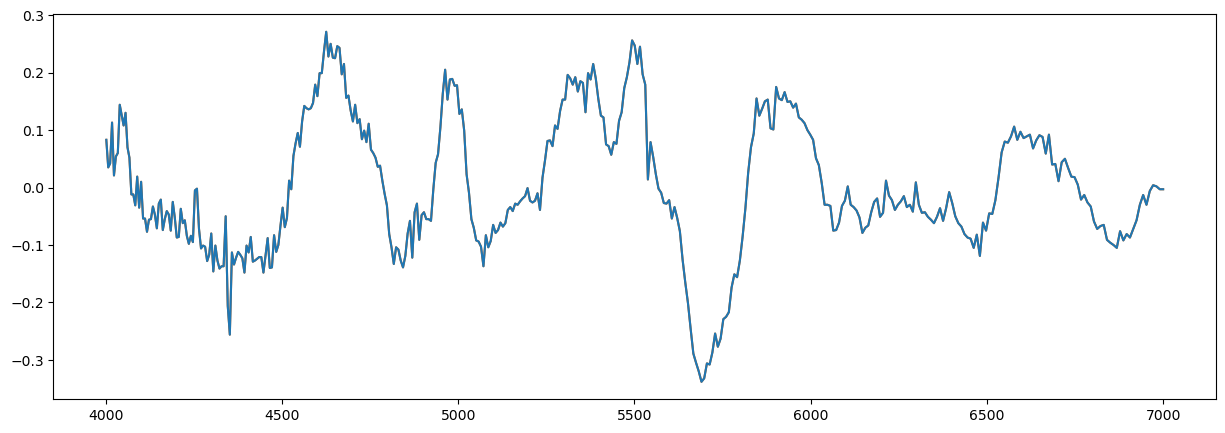

In [53]:
f = sn04gt.interp1dSpec('Ph16.4', 4000, 7000, True)

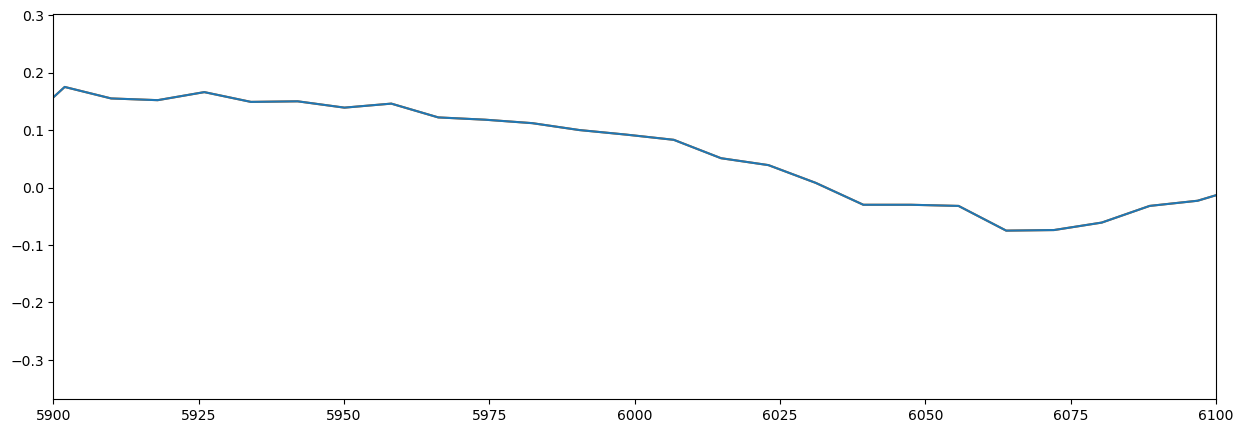

In [54]:
a = f.axes[0]
a.set_xlim((5900, 6100))
f

In [55]:
sn04gt.header['TypeStr']

'Ic-norm'

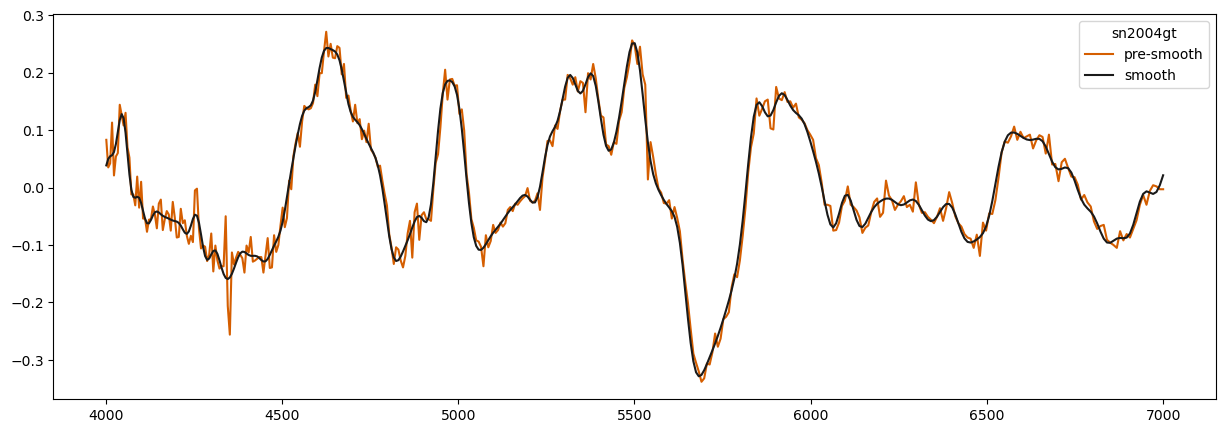

In [56]:
f=sn04gt.smoothSpectrum('Ph16.4', velcut=1000, plot=True)

You can write a SNIDsn object back to a SNID .lnw template file:

In [58]:
sn04gt.write_lnw('write_04gt.lnw')

You can save your SNIDsn object using pickle (it automatically names the pickle file and puts it in the directory you specify.):

In [59]:
sn04gt.save('Tutorial_Data/')

## SNIDdataset

For many applications, you will want to load many SNID templates and easily work with them in a dataset. This module facilitates your work by creating a dictionary of SNIDsn objects. 

Load the templates specified in snlist, located in the directory specified by pathdir.

In [75]:
SNIDset = SNIDdataset.loadDataset(pathdir='Tutorial_Data/', snlist='Tutorial_Data/snlist.txt')

sn1997ef.lnw

sn1998dt.lnw

sn2004dk.lnw

sn2004gq.lnw

sn2004gt.lnw

sn2007Y.lnw

sn2008ax.lnw

sn2010ay.lnw

sn2011ei.lnw

sn2011fu.lnw



In [76]:
SNIDset.keys()

odict_keys(['sn1997ef', 'sn1998dt', 'sn2004dk', 'sn2004gq', 'sn2004gt', 'sn2007Y', 'sn2008ax', 'sn2010ay', 'sn2011ei', 'sn2011fu'])

Get the type breakdown of your dataset:

In [62]:
typedict = SNIDdataset.datasetTypeDict(SNIDset)

In [63]:
typedict

{'IcBL': array(['sn1997ef', 'sn2010ay'], dtype='<U8'),
 'Ib': array(['sn1998dt', 'sn2004dk', 'sn2004gq', 'sn2007Y'], dtype='<U8'),
 'Ic': array(['sn2004gt'], dtype='<U8'),
 'IIb': array(['sn2008ax', 'sn2011ei', 'sn2011fu'], dtype='<U8')}

Use the type dictionary to create subsets of your dataset:

In [64]:
IIb_dataset = SNIDdataset.subset(SNIDset, typedict['IIb'])

In [65]:
IIb_dataset.keys()

dict_keys(['sn2008ax', 'sn2011ei', 'sn2011fu'])

Replace all SNIDsn objects 0.0 values with NaN.

In [66]:
SNIDdataset.snidsetNAN(SNIDset)

Interpolate all small gaps in all spectra of all SNIDsn objects.

In [79]:
SNIDdataset.interpGaps(SNIDset, 4000, 7000, 20)

Specify common wavelength range for dataset.

In [80]:
SNIDdataset.datasetWavelengthRange(SNIDset, 4000, 7000)

Smooth all spectra of all SNIDsn objects.

In [81]:
SNIDdataset.smoothSpectra(SNIDset, velcut=1000, velcutIcBL=3000, plot=False)

Visualize dataset

In [95]:
# Plot mean spectra for 'sn1997ef'
SNIDset

odict_keys(['sn1997ef', 'sn1998dt', 'sn2004dk', 'sn2004gq', 'sn2004gt', 'sn2007Y', 'sn2008ax', 'sn2010ay', 'sn2011ei', 'sn2011fu'])

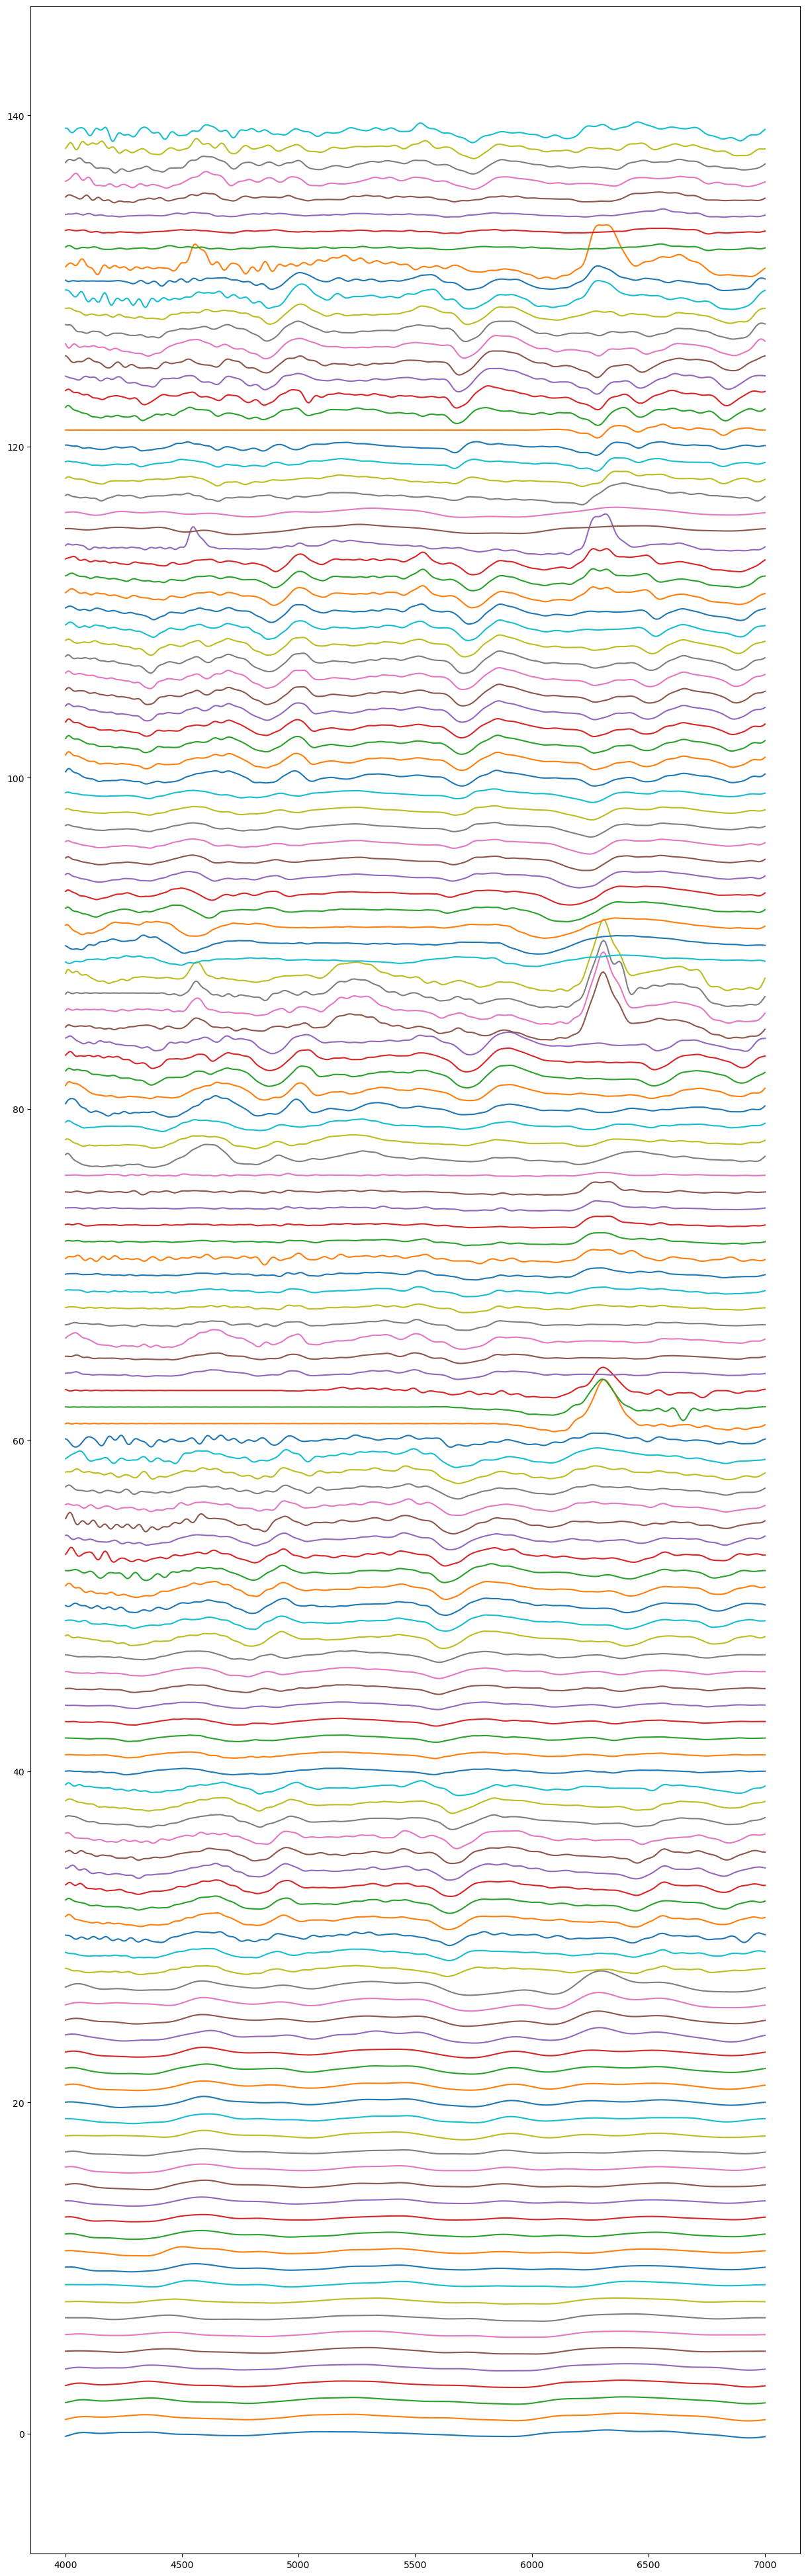

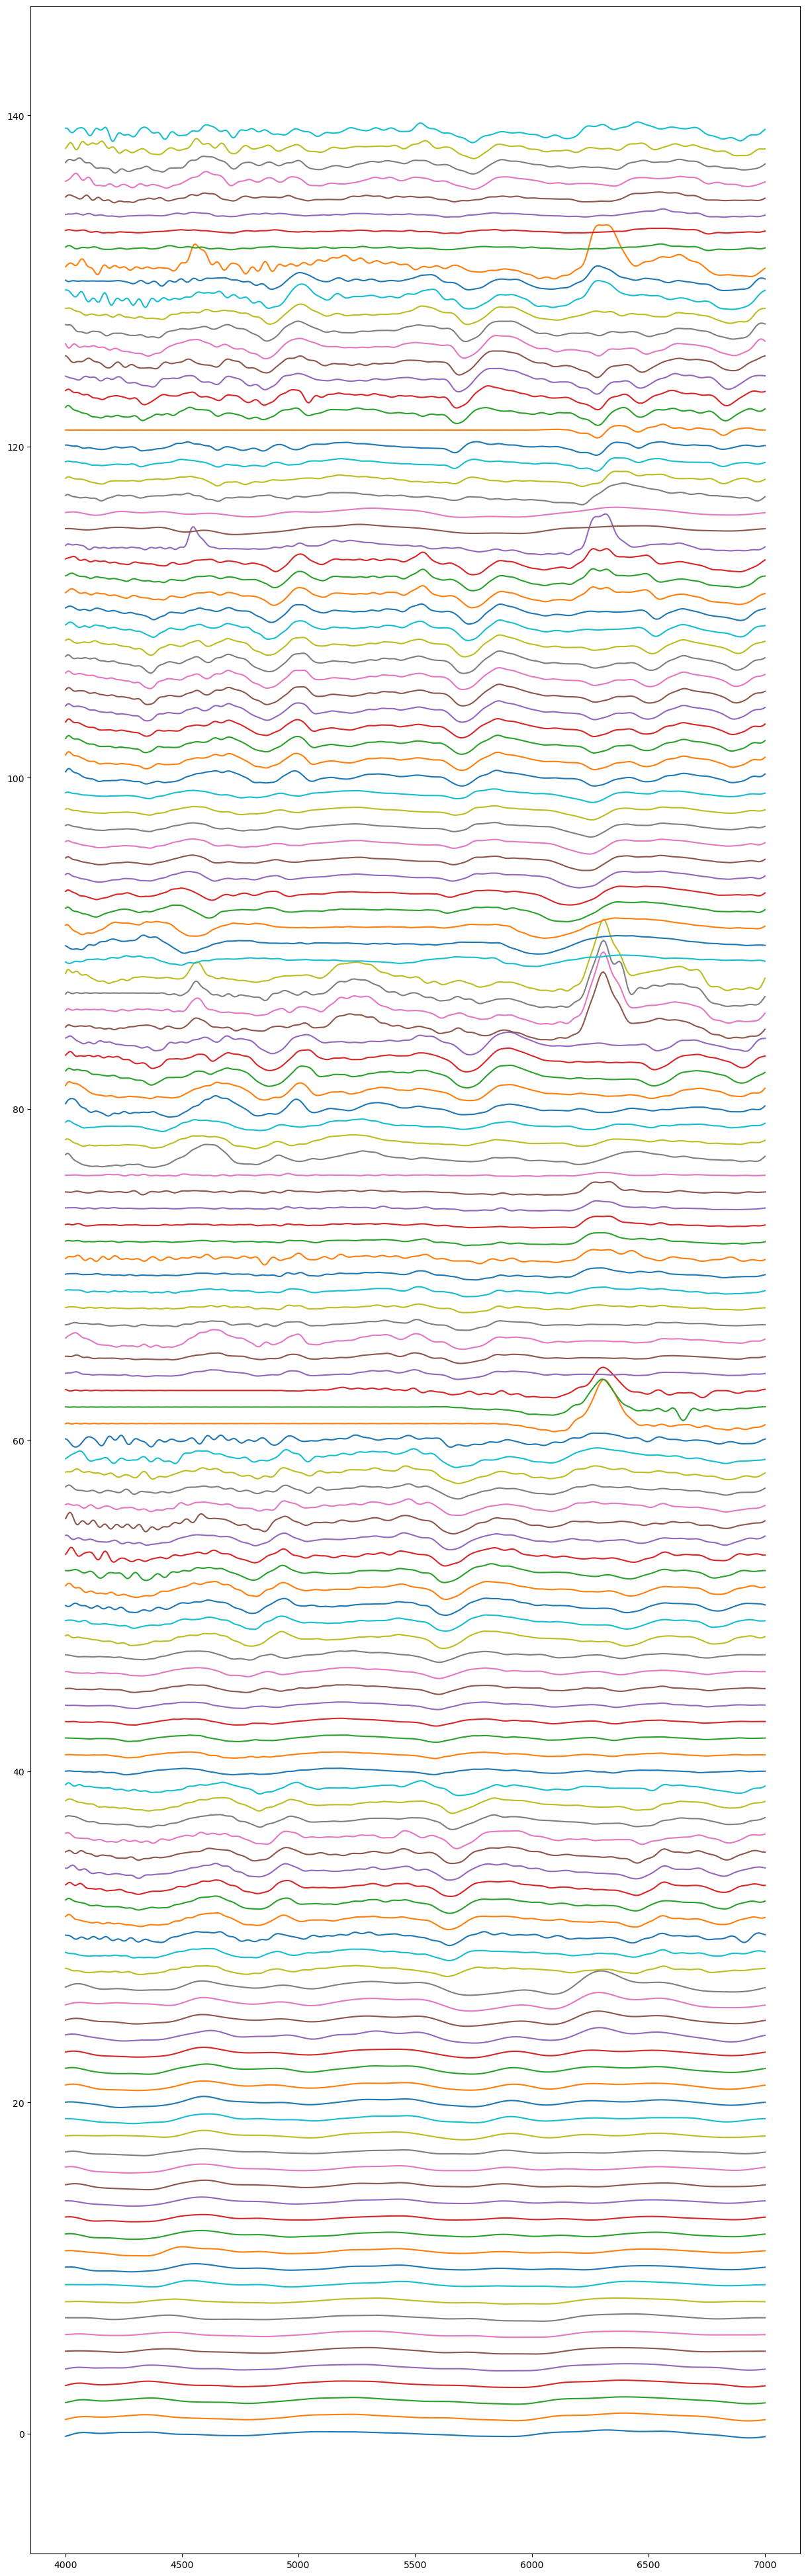

In [148]:
SNIDdataset.plotDataset(SNIDset, (15,50))

Get phase info for all SNIDsn in the dataset

In [71]:
SNIDdataset.datasetPhaseDict(SNIDset)

{'sn1997ef': array([-13.9, -11.8, -10.9, -10. ,  -9.1,  -6.1,  -5.1,  -5. ,  -4.1,
         12.8,  13.8,  15.7,  16.8,  18.6,  19.6,  21.6,  26.5,  40.3,
         44.3,  46.2,  48.1,  48.4,  75. ,  79.8, 104.8]),
 'sn1998dt': array([ 1.8,  2.8,  5.7,  8.7,  9.7, 12.6, 13.6, 18.5, 33.8]),
 'sn2004dk': array([14.2, 17.2, 46.1]),
 'sn2004gq': array([-9. , -8.1, -7.1, -6.1, -5.1, -2.1, -1.1, -0.1, 15.8, 16.8, 17.8,
        20.8, 20.8, 24.7, 41.6, 54.6, 69.5, 72.5, 78.4, 84.4, 89.3]),
 'sn2004gt': array([ 16.4,  18.4,  19.4,  22.4,  43.3,  48.2,  70.1,  81.1, 100. ,
        131.8, 141.7, 167.6, 186.5]),
 'sn2007Y': array([-15. ,  -9. ,  -2. ,   4.9,   7.9,  12.8,  19.8,  37.7, 197.3,
        267.8]),
 'sn2008ax': array([-20. , -19. , -18. , -16. , -15. , -13. , -12. , -11. , -10. ,
         -9. ,  -8. ,   6. ,   8. ,   9. ,   9. ,  12. ,  15. ,  16. ,
         19. ,  23. ,  37.9,  44.9,  66.9,  73.8,  79.8, 306.4]),
 'sn2010ay': array([15.7, 25.5]),
 'sn2011ei': array([-14., -10.,  -6.,  -4

Filter out phases

In [72]:
SNIDdataset.filterPhases(SNIDset, [(10,20)], False)

In [73]:
SNIDdataset.datasetPhaseDict(SNIDset)

{'sn1997ef': array([12.8, 13.8, 15.7, 16.8, 18.6, 19.6]),
 'sn1998dt': array([12.6, 13.6, 18.5]),
 'sn2004dk': array([14.2, 17.2]),
 'sn2004gq': array([15.8, 16.8, 17.8]),
 'sn2004gt': array([16.4, 18.4, 19.4]),
 'sn2007Y': array([12.8, 19.8]),
 'sn2008ax': array([12., 15., 16., 19.]),
 'sn2010ay': array([15.7]),
 'sn2011ei': array([13., 17.]),
 'sn2011fu': array([17., 19.])}

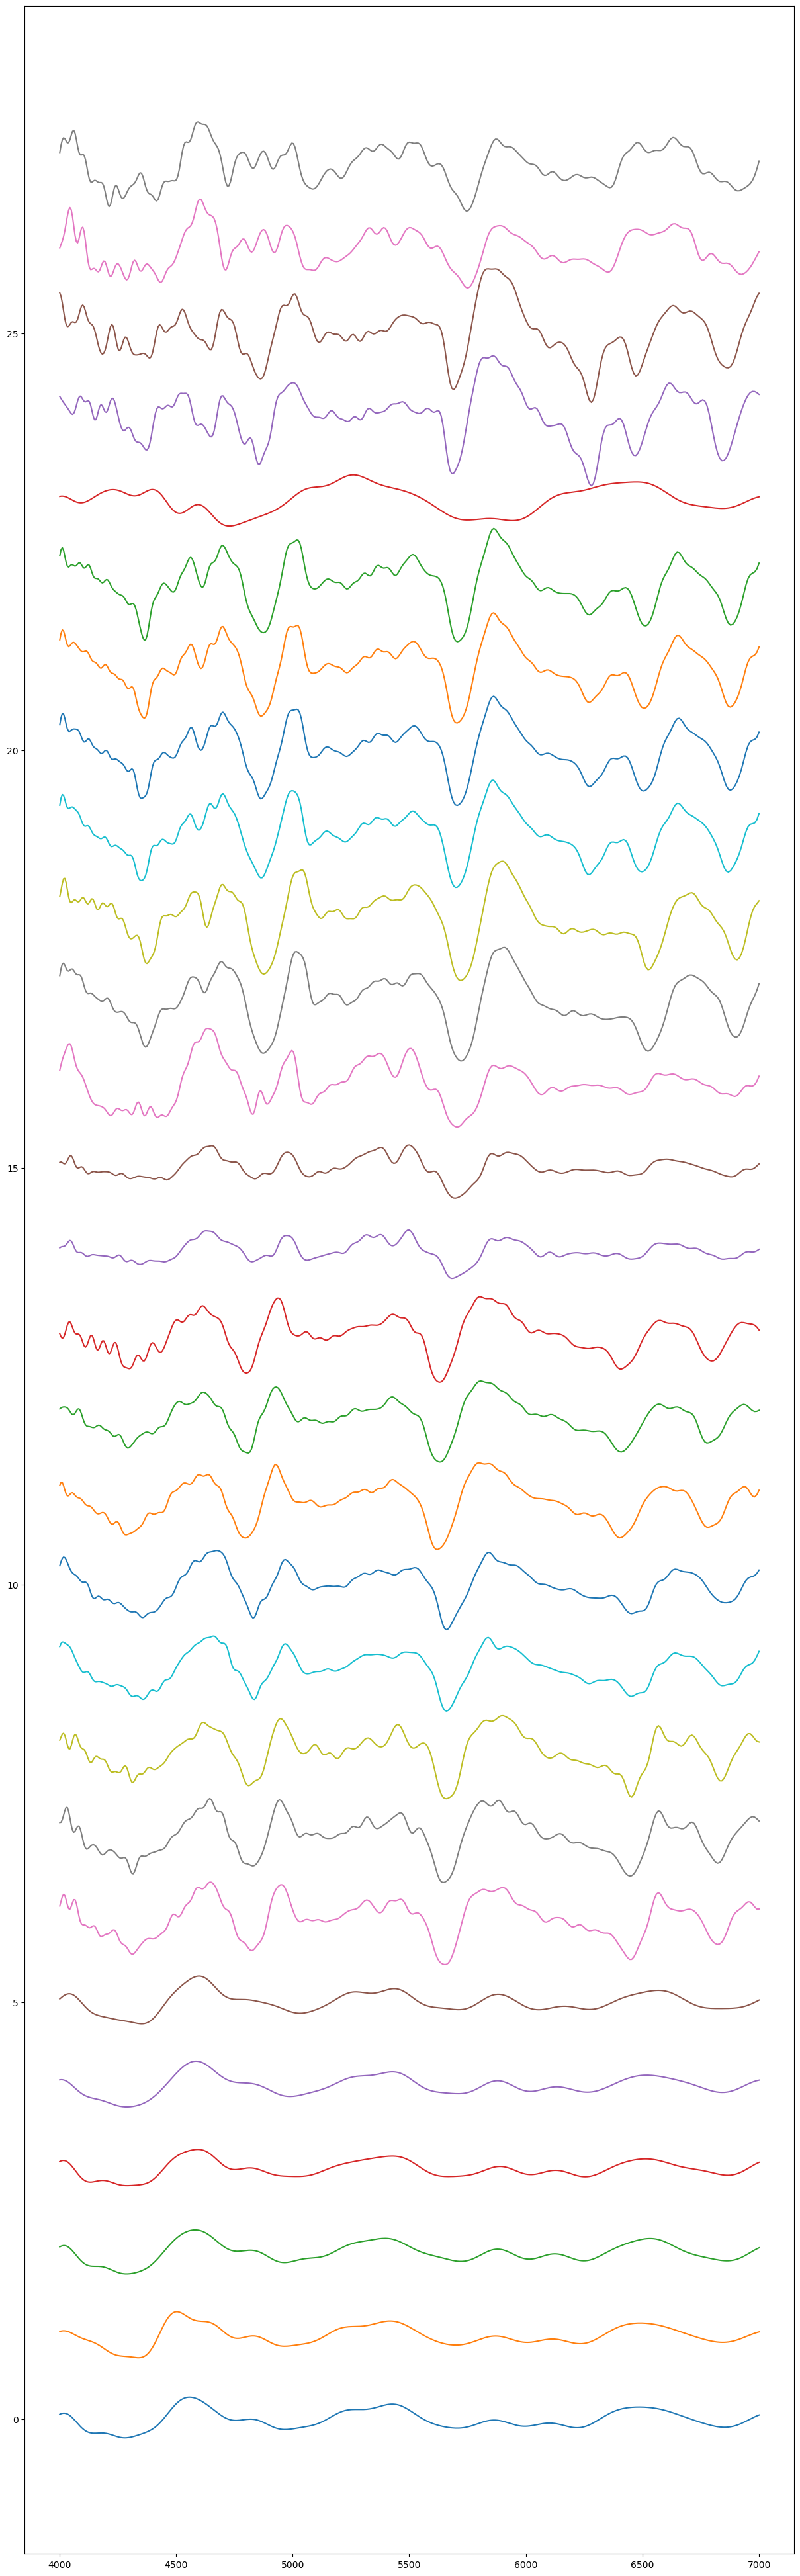

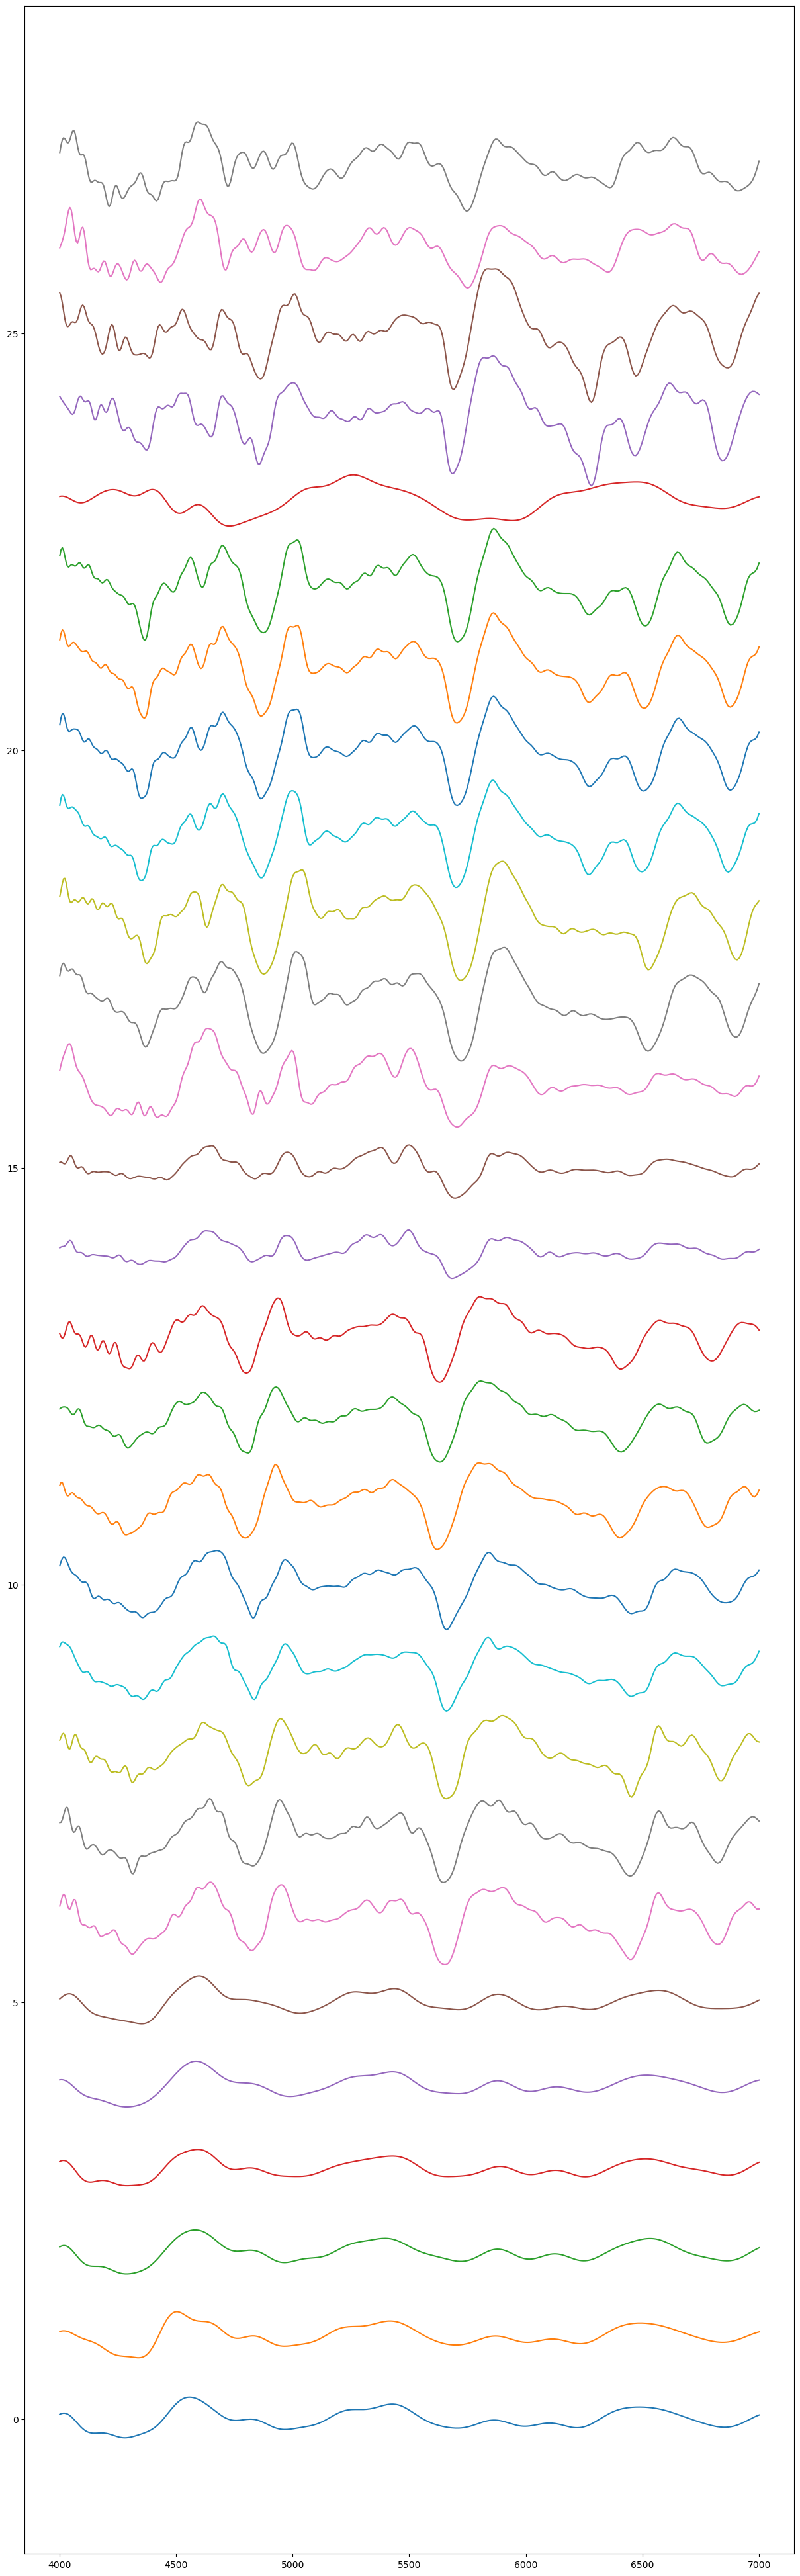

In [74]:
SNIDdataset.plotDataset(SNIDset, (15,50))